In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [63]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [64]:
df.shape

(100000, 9)

In [65]:
## DATA CLEAING

In [66]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [67]:
df.duplicated().sum()

3854

In [68]:
df = df.drop_duplicates()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [70]:
df['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [71]:
# DATA VISUALIZATION

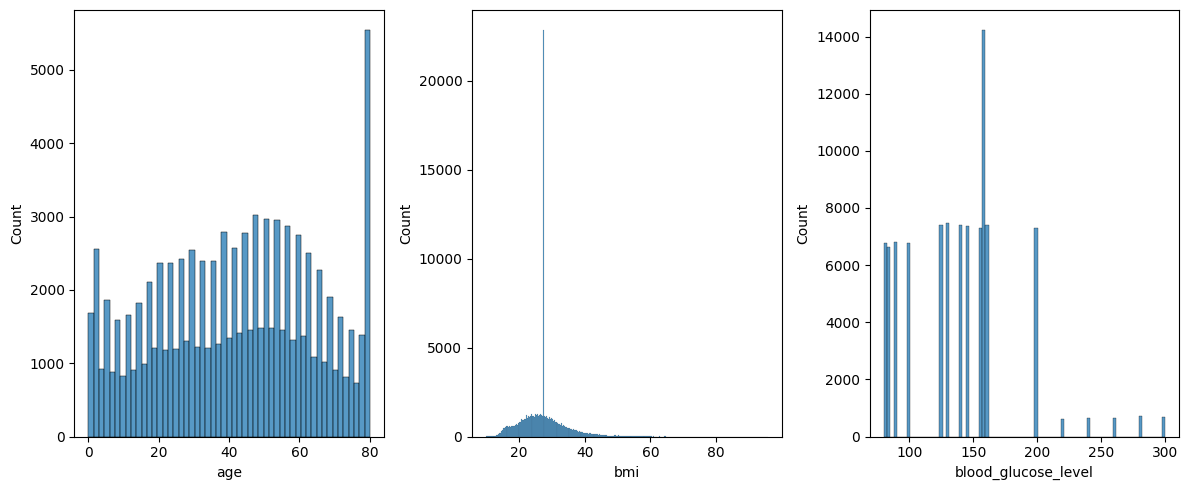

In [72]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
sns.histplot(data=df,x='age',ax=ax[0])
sns.histplot(data=df,x='bmi',ax=ax[1])
sns.histplot(data=df,x='blood_glucose_level',ax=ax[2])

plt.tight_layout()
plt.show()

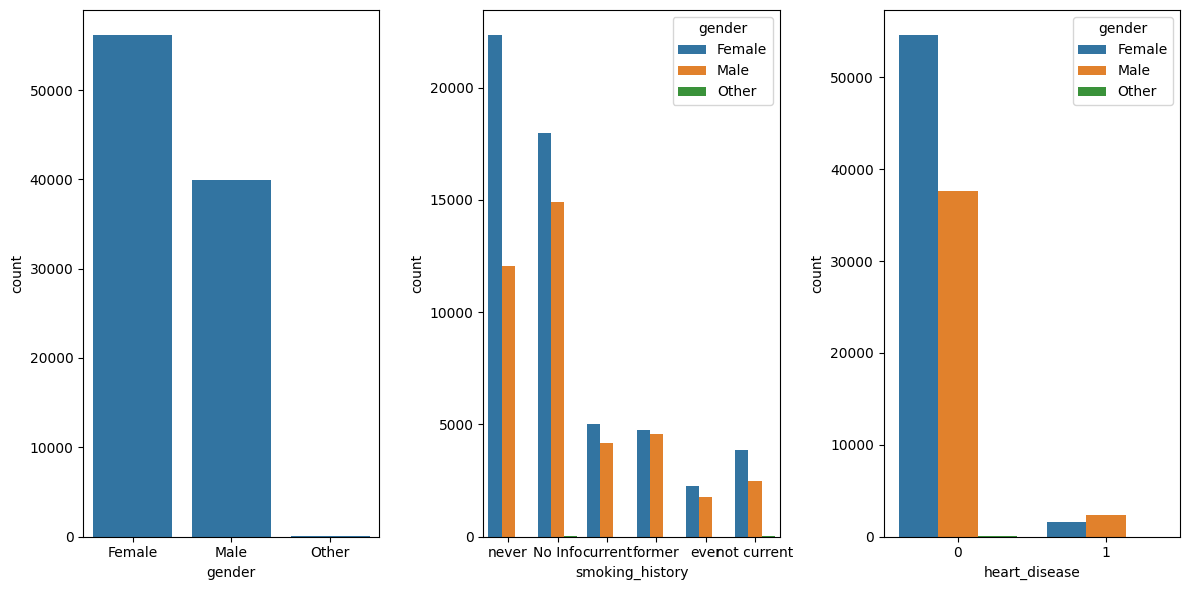

In [73]:
fig, ax = plt.subplots(1,3,figsize=(12,6))
sns.countplot(data=df,x='gender',ax=ax[0])
sns.countplot(data=df,x='smoking_history',hue='gender',ax=ax[1])
# sns.countplot(data=df,x='diabetes',ax=ax[2])
sns.countplot(data=df,x='heart_disease',hue='gender',ax=ax[2])

plt.tight_layout()
plt.show()

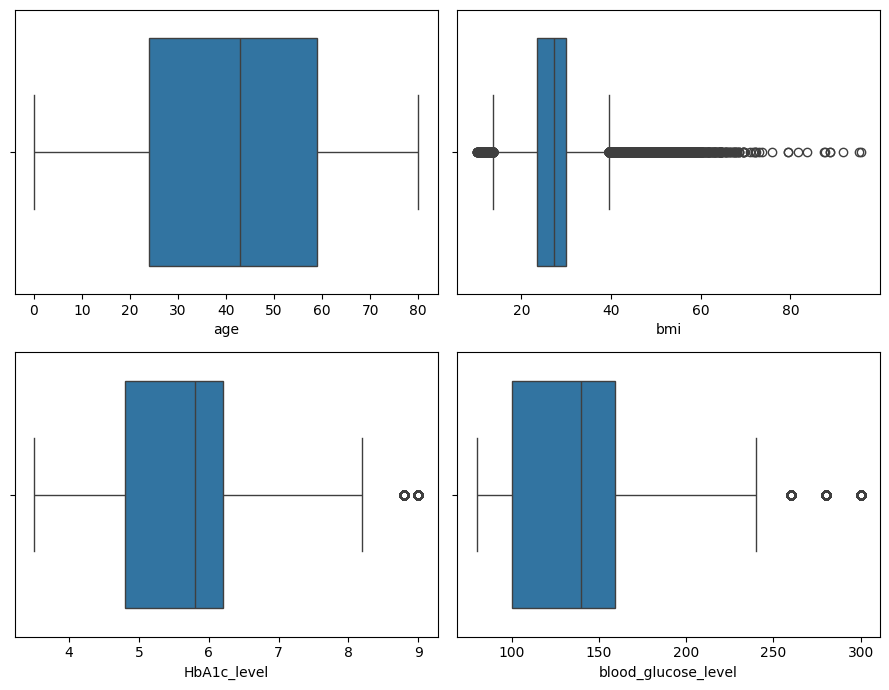

In [74]:
# checking outliers
fig,ax = plt.subplots(2,2,figsize=(9,7))
sns.boxplot(data=df,x='age',ax=ax[0,0])
sns.boxplot(data=df,x='bmi',ax=ax[0,1])
sns.boxplot(data=df,x='HbA1c_level',ax=ax[1,0])
sns.boxplot(data=df,x='blood_glucose_level',ax=ax[1,1])

plt.tight_layout()
plt.show()

In [76]:
# DATA PREPROCESSING

In [77]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [78]:
encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])

In [79]:
X = df.drop(columns = ['diabetes'])
y = df['diabetes']

In [80]:
# Standardization
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.3,random_state=42)

In [82]:
X_train.shape

(67302, 8)

In [83]:
# MODEL BUILDING

In [84]:
# ANN Architecture
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=8))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1152      
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 8)                

In [85]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [86]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
2104/2104 [==============================] - 9s 4ms/step - loss: 0.1134 - accuracy: 0.9604 - val_loss: 0.0944 - val_accuracy: 0.9666
Epoch 2/10
2104/2104 [==============================] - 7s 3ms/step - loss: 0.0935 - accuracy: 0.9675 - val_loss: 0.0897 - val_accuracy: 0.9688
Epoch 3/10
2104/2104 [==============================] - 8s 4ms/step - loss: 0.0903 - accuracy: 0.9685 - val_loss: 0.0899 - val_accuracy: 0.9676
Epoch 4/10
2104/2104 [==============================] - 8s 4ms/step - loss: 0.0896 - accuracy: 0.9690 - val_loss: 0.0854 - val_accuracy: 0.9704
Epoch 5/10
2104/2104 [==============================] - 7s 3ms/step - loss: 0.0878 - accuracy: 0.9692 - val_loss: 0.0858 - val_accuracy: 0.9706
Epoch 6/10
2104/2104 [==============================] - 8s 4ms/step - loss: 0.0881 - accuracy: 0.9692 - val_loss: 0.0858 - val_accuracy: 0.9697
Epoch 7/10
2104/2104 [==============================] - 7s 3ms/step - loss: 0.0868 - accuracy: 0.9696 - val_loss: 0.0841 - val_accuracy:

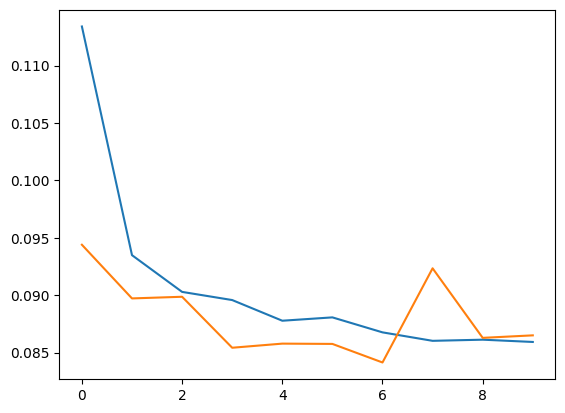

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

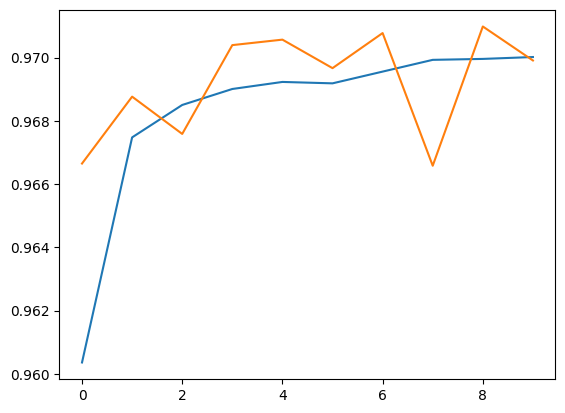

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])